<a href="https://colab.research.google.com/github/rus4787/Business-evaluation-of-the-product/blob/main/%D0%9C%D0%B0%D1%80%D0%B8%D0%BD%D0%B0_%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BF%D1%80%D0%BE%D0%B4%D0%B0%D0%B6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q phik

In [ ]:
import time
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import phik
from phik import resources

In [ ]:
class timex:
    def __enter__(self):
        # Фиксация времени старта процесса
        self.t = time.time()
        return self

    def __exit__(self, type, value, traceback):
        # Вывод времени работы
        print('Время обработки: {:.2f} с'.format(time.time() - self.t))

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)        # Игнорировать FutureWarning
warnings.simplefilter(action='ignore', category=DeprecationWarning)   # Игнорировать DeprecationWarning
warnings.simplefilter(action='ignore', category=SyntaxWarning)        # Игнорировать SyntaxWarning
warnings.simplefilter(action='ignore', category=RuntimeWarning)       # Игнорировать RuntimeWarning
warnings.simplefilter(action='ignore', category=UserWarning)          # Игнорировать UserWarning

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Оценка продаж 2023-2024 года

## Общие данные по таблице

In [ ]:
final_df = joblib.load('/content/drive/MyDrive/barnaul_analitic/analitic_product/таблица_клиенты_цикл_сделки.joblib')
final_df_2 = joblib.load('/content/drive/MyDrive/barnaul_analitic/analitic_product/final_df_2.joblib')

In [ ]:
df_1 = final_df_2.copy()

In [ ]:
df_1.head(2)

,инн_организации,год,дата_оплаты_счета,дата_первого_звонка,дата_последнего_звонка,отказ,заявка,минут_разговора,минут_звонка,количество_звонков,номер_менеджера,средняя_настойчивость,среднее_количество_вопросов,средняя_вероятность_продажи_ГПТ,количество_продажных_разговоров,сумма,количество_удостоверений,цена_за_удостоверение,наименование_региона,оквэд,вид_деятельности,фио_менеджера,количество_счетов,количество_пакет,бюджет,статус,месяц,длительность_убеждения,цикл сделки
0,101004611,2024,2024-06-24,2024-06-20,2024-06-20,0,1,0,10,1,7388,0.0,10.0,0.510,0,22695.0,3.0,7565.0,Республика Адыгея,01.11,"Сельское, лесное хозяйство, охота, рыболовство и рыбоводство",Неугодникова Наталия Валериевна,1.0,0.0,0,завершена,6.0,0,4.0
1,101004611,2024,2262-04-11,2024-07-10,2024-07-10,0,0,0,15,1,7388,0.0,4.0,0.786,1,NaN,NaN,NaN,Республика Адыгея,01.11,"Сельское, лесное хозяйство, охота, рыболовство и рыбоводство",NaN,NaN,NaN,0,текущая,NaN,0,NaN


В таблице 33758 строк за два года. распределение по годам:

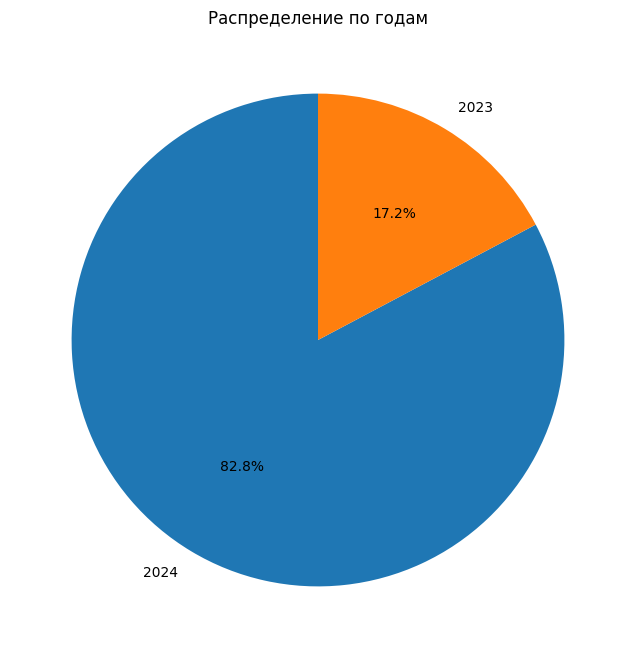

In [ ]:
df_1['год'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Распределение по годам')
plt.ylabel('')
plt.show()

распределение по продажам:

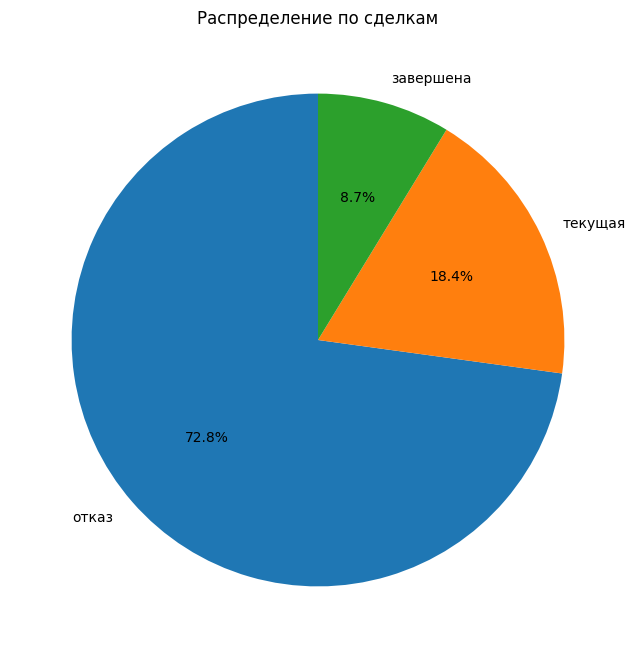

In [ ]:
df_1['статус'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8))
plt.title('Распределение по сделкам')
plt.ylabel('')
plt.show()

In [ ]:
df_1.groupby(['год', 'статус'])['заявка'].agg('count')

год   статус   
2023  завершена      217
      отказ         5604
2024  завершена     2730
      отказ        18982
      текущая       6225
Name: заявка, dtype: int64

✅ **Для Марины**

У нас сильный перекос по данным: большое количество отказов в каждом году. очень мало завершенных сделок. Мне не нравятся - но так как ты считаешь что цикл сделки по клиентам не верен, будем работать с этой базой. И данных мало. Для сравнения в базе по клиентам:

In [ ]:
final_df.groupby(['год', 'статус'])['заявка'].agg('count')

год   статус   
2020  завершена      2496
      отказ          5656
2021  завершена      7274
      отказ         16731
2022  завершена      6371
      отказ         30417
2023  завершена       350
      отказ         99925
      текущая        1833
2024  завершена      5785
      отказ        128071
      текущая       22783
Name: заявка, dtype: int64

## Корреляция

In [ ]:
df_corr = df_1[df_1['оквэд'] != '-']
df_corr = df_corr[df_corr['цикл сделки'] >= 0]
df_corr['месяц_начала_убеждения'] = df_corr['дата_первого_звонка'].dt.month
df_corr['год_начала_убеждения'] = df_corr['дата_первого_звонка'].dt.year
df_corr['месяц_конца_убеждения'] = df_corr['дата_последнего_звонка'].dt.month
df_corr['год_конца_убеждения'] = df_corr['дата_последнего_звонка'].dt.year
df_corr['месяц_начала_убеждения'] = df_corr['дата_первого_звонка'].dt.month
df_corr['год_начала_убеждения'] = df_corr['дата_первого_звонка'].dt.year
df_corr['месяц_сделки'] = df_corr['дата_оплаты_счета'].dt.month
df_corr['год_сделки'] = df_corr['дата_оплаты_счета'].dt.year
df_corr.head(1)

,инн_организации,год,дата_оплаты_счета,дата_первого_звонка,дата_последнего_звонка,отказ,заявка,минут_разговора,минут_звонка,количество_звонков,номер_менеджера,средняя_настойчивость,среднее_количество_вопросов,средняя_вероятность_продажи_ГПТ,количество_продажных_разговоров,сумма,количество_удостоверений,цена_за_удостоверение,наименование_региона,оквэд,вид_деятельности,фио_менеджера,количество_счетов,количество_пакет,бюджет,статус,месяц,длительность_убеждения,цикл сделки,месяц_начала_убеждения,год_начала_убеждения,месяц_конца_убеждения,год_конца_убеждения,месяц_сделки,год_сделки
0,101004611,2024,2024-06-24,2024-06-20,2024-06-20,0,1,0,10,1,7388,0.0,10.0,0.51,0,22695.0,3.0,7565.0,Республика Адыгея,01.11,"Сельское, лесное хозяйство, охота, рыболовство и рыбоводство",Неугодникова Наталия Валериевна,1.0,0.0,0,завершена,6.0,0,4.0,6,2024,6,2024,6,2024


In [ ]:
df_corr.drop(['дата_оплаты_счета', 'дата_первого_звонка', 'дата_последнего_звонка',
              'отказ', 'заявка', 'фио_менеджера', 'месяц'], axis=1, inplace=True)

In [ ]:
phik_matrix = df_corr.phik_matrix()

interval columns not set, guessing: ['инн_организации', 'год', 'минут_разговора', 'минут_звонка', 'количество_звонков', 'номер_менеджера', 'средняя_настойчивость', 'среднее_количество_вопросов', 'средняя_вероятность_продажи_ГПТ', 'количество_продажных_разговоров', 'сумма', 'количество_удостоверений', 'цена_за_удостоверение', 'количество_счетов', 'количество_пакет', 'бюджет', 'длительность_убеждения', 'цикл сделки', 'месяц_начала_убеждения', 'год_начала_убеждения', 'месяц_конца_убеждения', 'год_конца_убеждения', 'месяц_сделки', 'год_сделки']


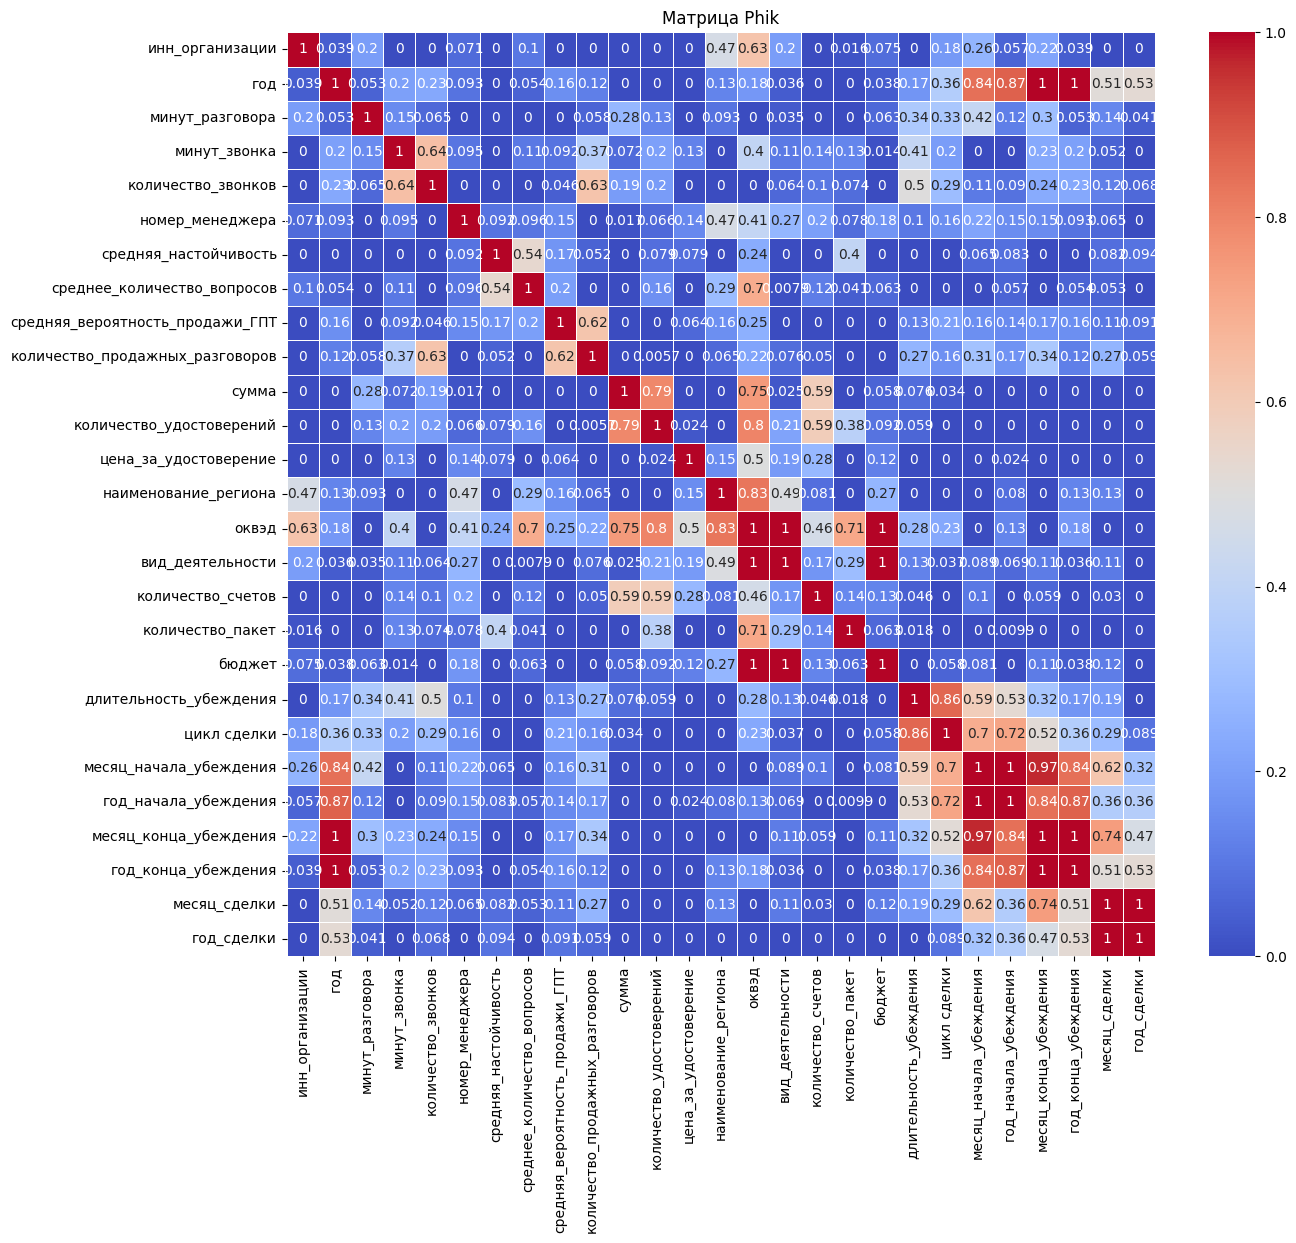

In [ ]:
plt.figure(figsize=(14, 12))
sns.heatmap(phik_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Матрица Phik')
plt.show()

оценка корреляции продаж показала что прибыль связанна с ОКВЭД и количеством удостоверений. Признак разговора (настойчивость. количество вопросов. предсказания ГПТ на прибыль не влияют. В основном они зависят от типа ОКВЭД - по сути структуру разговора формирует клиент. Аналогично с типом организации коррелирует МЕНЕДЖЕР, ТИП РАЗГОВОРА, ПРИБЫЛЬ, РЕГИОН (что странно), ТИП ПРОДАЖ. То есть основным ориентируемым признаком - является КЛИЕНТ (не менеджер или продукт).

### Смотрим что же покупают ОКВЭД

План:

- данных по дате счета и только за 2023-2024 года
- Расчет прибыльности по ОКВЭД.
- Анализ предпочтений по номенклатуре, типу номенклатуры и типу пакета.
- Анализ отказов.
- графики и таблицы:
    - ТОП-30 оквэд покупают больше по каким ценам
    - ТОП-30 оквэд отказываются больше от каких цен
    - разница цен для ТОП-5 номенклатур (отказались - купили)
    - ТОП-30 оквэд  покупают каких пакетов больше по каким ТОП-5 номенклатур
    - какие ТОП-10 оквэд больше покупают пакеты и какие именно  и по каким номенклатурам
    - какие ТОП-10 оквэд больше отказываются от пакетов и от каких именно и по каким номенклатурам
    - какие ТОП-5 пакетов продаются лучше всего

In [ ]:
table_nom =pd.read_parquet(f'/content/drive/MyDrive/barnaul_analitic/base/marina_table_price_nomenklatura.parquet')
df_org = joblib.load('/content/drive/MyDrive/barnaul_analitic/base/df_organizations.joblib')

In [ ]:
table_nom['сумма_за_удостоверение'] = table_nom['количество_удостоверений'] * table_nom['цена_за_удостоверение']
data_nom = table_nom.copy()
data_nom.dropna(subset=['год_оплаты'], inplace=True)
data_nom['год_оплаты'] = data_nom['год_оплаты'].astype(int)
data_nom['месяц_оплаты'] = data_nom['месяц_оплаты'].astype(int)

In [ ]:
a_table = df_org.groupby('расшифровка_оквэд').agg({'оквэд': 'first'}).reset_index()
okved_dict = dict(zip(a_table['расшифровка_оквэд'], a_table['оквэд']))
data_nom['оквэд'] = data_nom['расшифровка_оквэд'].map(okved_dict)
data_nom = data_nom[data_nom['оквэд']!= '-']
data_nom.head()

,идентификатор,номер_счета,номенклатура,тип_пакета,количество_удостоверений,цена_за_удостоверение,сумма_за_удостоверение,решение_об_оплате,номер_менеджера,фио_менеджера,инн_организации,наименование_организации,количество_студентов,тип_номенклатуры,код_номенклатуры,наименование_региона,расшифровка_оквэд,вид_деятельности,дата_счета,дата_оплаты,сумма,год_оплаты,месяц_оплаты,оквэд
1,65293090,38039460,135. Обучение по охране труда,None,2,2233,4466,оплачено,1153,Абдуразакова Елена Ивановна,2437005476,"МКДОУ ДЕТСКИЙ САД ""ТЕРЕМОК""",2,по направлению,135,Красноярский край,Деятельность в области дошкольного образования,Образование,2020-09-20,2020-10-21,4466.0,2020,10,85.11
3,65294228,38039939,173. Экология,None,1,1000,1000,оплачено,1153,Абдуразакова Елена Ивановна,1328009253,"ООО ""ЖСК""",3,по направлению,173,Республика Мордовия,Управление недвижимым имуществом,Деятельность по операциям с недвижимым имуществом,2020-10-15,2020-10-15,10000.0,2020,10,68.32
4,65294229,38039939,135. Обучение по охране труда,None,3,1000,3000,оплачено,1153,Абдуразакова Елена Ивановна,1328009253,"ООО ""ЖСК""",3,по направлению,135,Республика Мордовия,Управление недвижимым имуществом,Деятельность по операциям с недвижимым имуществом,2020-10-15,2020-10-15,10000.0,2020,10,68.32
5,65294230,38039939,155. Пожарно-технический минимум,None,1,1000,1000,оплачено,1153,Абдуразакова Елена Ивановна,1328009253,"ООО ""ЖСК""",3,по направлению,155,Республика Мордовия,Управление недвижимым имуществом,Деятельность по операциям с недвижимым имуществом,2020-10-15,2020-10-15,10000.0,2020,10,68.32
6,65294231,38039939,111. ГО И ЧС,None,2,1000,2000,оплачено,1153,Абдуразакова Елена Ивановна,1328009253,"ООО ""ЖСК""",3,по направлению,111,Республика Мордовия,Управление недвижимым имуществом,Деятельность по операциям с недвижимым имуществом,2020-10-15,2020-10-15,10000.0,2020,10,68.32


In [ ]:
# Фильтрация данных по дате счета, начиная с 2023-01-01
data_nom['дата_счета'] = pd.to_datetime(data_nom['дата_счета'])
data_nom = data_nom[data_nom['дата_счета'] >= '2023-01-01']

<ipython-input-28-620442110b92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nom['дата_счета'] = pd.to_datetime(data_nom['дата_счета'])


### Поехали

In [ ]:
# ТОП-30 ОКВЭД по прибыли
top_30_okved_profit = data_nom.groupby('оквэд')['сумма'].sum().reset_index().sort_values(by='сумма', ascending=False).head(30)
top_30_okved_profit

,оквэд,сумма
411,85.14,112742979.0
402,84.11,99860148.0
408,85.11,90184712.0
1,01.11,88090577.0
410,85.13,53857995.0
417,86.10,39487033.0
10,01.41,34501690.0
204,35.30,33776649.0
364,68.32,33196741.0
379,75.00,31178034.0


In [ ]:
# ТОП-30 ОКВЭД по отказам
rejects = data_nom[data_nom['решение_об_оплате'] == 'отказ']
top_30_okved_rejects = rejects.groupby('оквэд').size().reset_index(name='reject_count').sort_values(by='reject_count', ascending=False).head(30)
top_30_okved_rejects

,оквэд,reject_count
232,84.11,1883
239,85.14,735
236,85.11,632
1,01.11,551
238,85.13,481
212,68.32,423
243,85.41,238
245,86.10,238
116,36.00,222
6,01.41,208


In [ ]:
# Пересечения и различия между top_30_okved_profit и top_30_okved_rejects
intersection_okved_profit_rejects = pd.merge(top_30_okved_profit, top_30_okved_rejects, on='оквэд')
difference_okved_profit_rejects = top_30_okved_profit[~top_30_okved_profit['оквэд'].isin(top_30_okved_rejects['оквэд'])]

In [ ]:
intersection_okved_profit_rejects

,оквэд,сумма,reject_count
0,85.14,112742979.0,735
1,84.11,99860148.0,1883
2,85.11,90184712.0,632
3,01.11,88090577.0,551
4,85.13,53857995.0,481
5,86.10,39487033.0,238
6,01.41,34501690.0,208
7,35.30,33776649.0,205
8,68.32,33196741.0,423
9,75.00,31178034.0,131


✅ **Для Марины**

Эти ОКВЭД хорошо покупают но часто отказываются. Причем очень сильно 84.11 - значит что-то ему не нравится

In [ ]:
difference_okved_profit_rejects

,оквэд,сумма
0,01.1,11639818.0
29,07.29,9365425.0
84,16.10,8502154.0
442,93.19,8362986.0
392,80.10,7916604.0
328,52.21,7710992.0


✅ **Для Марины**

Эти ОКВЭД не отказывались

In [ ]:
# ТОП-5 номенклатур по прибыли
top_5_nomenclature_profit = data_nom.groupby('номенклатура')['сумма'].sum().reset_index().sort_values(by='сумма', ascending=False).head(5)
top_5_nomenclature_profit

,номенклатура,сумма
32,139. Оказание первой помощи пострадавшим,191144956.0
31,138. Общие вопросы охраны труда,176788211.0
39,146. Оценка профессиональных рисков,162930720.0
15,115. Использование (применение) средств индивидуальной защиты,131131859.0
44,"153. Пожарная безопасность для руководителей организаций, лиц, назначенных руководителем",85005628.0


In [ ]:
# ТОП-5 номенклатур по отказам
top_5_nomenclature_rejects = rejects.groupby('номенклатура').size().reset_index(name='reject_count').sort_values(by='reject_count', ascending=False).head(5)
top_5_nomenclature_rejects

,номенклатура,reject_count
30,139. Оказание первой помощи пострадавшим,1511
29,138. Общие вопросы охраны труда,1481
37,146. Оценка профессиональных рисков,1101
56,173. Экология,969
14,115. Использование (применение) средств индивидуальной защиты,924


In [ ]:
# Пересечения и различия между top_5_nomenclature_profit и top_5_nomenclature_rejects
intersection_nomenclature_profit_rejects = pd.merge(top_5_nomenclature_profit, top_5_nomenclature_rejects, on='номенклатура')
difference_nomenclature_profit_rejects = top_5_nomenclature_profit[~top_5_nomenclature_profit['номенклатура'].isin(top_5_nomenclature_rejects['номенклатура'])]

In [ ]:
intersection_nomenclature_profit_rejects

,номенклатура,сумма,reject_count
0,139. Оказание первой помощи пострадавшим,191144956.0,1511
1,138. Общие вопросы охраны труда,176788211.0,1481
2,146. Оценка профессиональных рисков,162930720.0,1101
3,115. Использование (применение) средств индивидуальной защиты,131131859.0,924


✅ **Для Марины**

По этим четырем надо смотреть отдельно - хорошо продают но часто отказываются. Надо найти причину


In [ ]:
difference_nomenclature_profit_rejects

,номенклатура,сумма
44,"153. Пожарная безопасность для руководителей организаций, лиц, назначенных руководителем",85005628.0


✅ Для Марины

От пожарки не отказываются - когда горит надо тушить.. Это направление для дальнейшей оценки - вдруг можно повысить стоимость без потерь

In [ ]:
# ТОП-30 ОКВЭД по ценам покупок
top_30_okved_prices = data_nom.groupby('оквэд')['цена_за_удостоверение'].mean().reset_index().sort_values(by='цена_за_удостоверение', ascending=False).head(30)
top_30_okved_prices

,оквэд,цена_за_удостоверение
105,20.42,17000.000000
300,47.72,13500.000000
188,32.30,13500.000000
322,50.20,13325.000000
167,28.15,11522.000000
140,25.21,11400.000000
138,24.52,11350.000000
59,10.86,10758.750000
447,94.20,10400.000000
5,01.2,9265.000000


In [ ]:
# ТОП-30 ОКВЭД по ценам отказов
rejects_prices = rejects.groupby('оквэд')['цена_за_удостоверение'].mean().reset_index().sort_values(by='цена_за_удостоверение', ascending=False).head(30)
rejects_prices

,оквэд,цена_за_удостоверение
85,25.40,25750.000000
186,50.20,25250.000000
25,09.10,15000.000000
164,47.21,8500.000000
264,93.2,8500.000000
47,13.92,8500.000000
135,45.1,8500.000000
15,01.62,8500.000000
265,93.21,8500.000000
203,61.10,8500.000000


In [ ]:
# Пересечения и различия между top_30_okved_prices и rejects_prices
intersection_okved_prices_rejects = pd.merge(top_30_okved_prices, rejects_prices, on='оквэд')
difference_okved_prices_rejects = top_30_okved_prices[~top_30_okved_prices['оквэд'].isin(rejects_prices['оквэд'])]

In [ ]:
intersection_okved_prices_rejects

,оквэд,цена_за_удостоверение_x,цена_за_удостоверение_y
0,50.20,13325.000000,25250.000000
1,01.62,8500.000000,8500.000000
2,14.3,8500.000000,8500.000000
3,28.13,8500.000000,8500.000000
4,47.21,8500.000000,8500.000000
5,25.40,8048.571429,25750.000000
6,24.34,7500.000000,7500.000000
7,26.52,7000.000000,7000.000000
8,16.22,6633.333333,6633.333333


✅ **Для Марины**

Смотри. Отказы не зависят от цены для покупаемых и отказов.. Но не для 25.40 и 50.20: по ним на отказы влиет цена. Стоит для 25.40 и 50.20 установить продаваемые цены за удостоверение: 8048 и 13325

In [ ]:
difference_okved_prices_rejects

,оквэд,цена_за_удостоверение
105,20.42,17000.000000
300,47.72,13500.000000
188,32.30,13500.000000
167,28.15,11522.000000
140,25.21,11400.000000
138,24.52,11350.000000
59,10.86,10758.750000
447,94.20,10400.000000
5,01.2,9265.000000
185,31.02,9205.000000


In [ ]:
# Разница цен для ТОП-5 номенклатур (отказались - купили)
bought = data_nom[data_nom['решение_об_оплате'] == 'оплачено']
bought_prices = bought.groupby('номенклатура')['цена_за_удостоверение'].mean().reset_index()
rejects_prices_2 = rejects.groupby('номенклатура')['цена_за_удостоверение'].mean().reset_index()
price_diff = pd.merge(bought_prices, rejects_prices_2, on='номенклатура', suffixes=('_bought', '_rejected'))
price_diff['price_diff'] = price_diff['цена_за_удостоверение_rejected'] - price_diff['цена_за_удостоверение_bought']
top_5_price_diff = price_diff.sort_values(by='price_diff', ascending=False).head(5)
top_5_price_diff

,номенклатура,цена_за_удостоверение_bought,цена_за_удостоверение_rejected,price_diff
15,120. Комплексное обеспечение антитеррористической защищенности на объектах средних учебных заведений,1580.905109,2175.20000,594.294891
22,135. Обучение по охране труда,443.262295,994.57672,551.314424
13,117. Комплексное обеспечение антитеррористической защищенности на объектах детских дошкольных учрежд,1502.458333,1721.37500,218.916667
14,118. Комплексное обеспечение антитеррористической защищенности на объектах здравоохранения,1914.314286,2075.00000,160.685714
50,354. Пакет Доступ на 1 год,0.000000,0.00000,0.000000


✅ **Для Марины**

Для номенклатур установить чены: Комплексное обеспечение антитеррористической защищенности на объектах спорта - 2100, Комплексное обеспечение антитеррористической защищенности на объектах здравоохранения - 1900, Обучение по охране труда - 500, Комплексное обеспечение антитеррористической защищенности на объектах средних учебных заведений - 1600, Комплексное обеспечение антитеррористической защищенности на объектах детских дошкольных учрежд - 1600

In [ ]:
# ТОП-30 ОКВЭД покупают каких пакетов больше по каким ТОП-5 номенклатур
top_30_okved_packages = data_nom.groupby(['оквэд', 'номенклатура', 'тип_пакета']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(30)
top_30_okved_packages.sort_values(by='оквэд')

,оквэд,номенклатура,тип_пакета,count
4,01.11,135. Обучение по охране труда,Пакет 100 за 50000,7
5,01.11,135. Обучение по охране труда,Пакет 250 за 87500,4
17,01.41,135. Обучение по охране труда,Пакет 40 за 25000,3
20,01.41,678. Не установлен,не установлен,3
13,01.41,135. Обучение по охране труда,Пакет 100 за 50000,3
40,07.29,135. Обучение по охране труда,Пакет 130 за 58500,3
62,14.12,135. Обучение по охране труда,Пакет 100 за 50000,2
69,20.14,678. Не установлен,не установлен,2
71,20.15,678. Не установлен,персональный,2
70,20.15,135. Обучение по охране труда,Пакет 350 за 105000,2


✅ **Для Марины**

Все любимые пакеты - по Охране труда. Причем хорошо заходит Пакет 100 за 50000 и Пакет 40 за 25000. Все остальные большей частью первонализированные. Но есть смысл для данных оквед продажу предлогать больше на пакетной основе с 5% скидкой цены за удостоверение. Смотри ниже

In [ ]:
# ТОП-10 ОКВЭД больше покупают пакеты и какие именно и по каким номенклатурам
top_10_okved_buy_packages = data_nom[data_nom['решение_об_оплате'] == 'оплачено'].groupby(['оквэд',
                                                                               'номенклатура',
                                                                               'тип_пакета']).size().reset_index(name='count').sort_values(by='count',
                                                                                                                                           ascending=False).head(10)
top_10_okved_buy_packages

,оквэд,номенклатура,тип_пакета,count
3,01.11,135. Обучение по охране труда,Пакет 100 за 50000,5
114,51.21,135. Обучение по охране труда,Пакет 130 за 58500,3
78,41.20,135. Обучение по охране труда,Пакет 100 за 50000,3
4,01.11,135. Обучение по охране труда,Пакет 250 за 87500,3
143,80.10,135. Обучение по охране труда,Пакет 40 за 25000,3
30,07.29,135. Обучение по охране труда,Пакет 130 за 58500,3
159,86.10,135. Обучение по охране труда,Пакет 100 за 50000,3
21,01.50,135. Обучение по охране труда,Пакет 250 за 87500,2
112,49.41,678. Не установлен,персональный,2
79,41.20,135. Обучение по охране труда,Пакет 160 за 64000,2


In [ ]:
# ТОП-10 ОКВЭД больше отказываются от пакетов и от каких именно и по каким номенклатурам
top_10_okved_reject_packages = rejects.groupby(['оквэд', 'номенклатура', 'тип_пакета']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(10)
top_10_okved_reject_packages

,оквэд,номенклатура,тип_пакета,count
40,24.44,678. Не установлен,не установлен,6
12,01.41,678. Не установлен,не установлен,3
71,46.9,678. Не установлен,не установлен,3
54,35.30,678. Не установлен,не установлен,3
127,93.19,678. Не установлен,не установлен,2
67,46.73,135. Обучение по охране труда,персональный,2
105,85.11,135. Обучение по охране труда,Пакет 40 за 25000,2
46,27.11,135. Обучение по охране труда,Пакет 1000 за 200000,2
55,35.30,678. Не установлен,персональный,2
31,20.14,678. Не установлен,не установлен,2


Почему-то 85.11 дважды отказался от пакетов 40 за 25000. Трудно уламываются 24.44 и 01.41

In [ ]:
# Пересечения и различия между top_10_okved_buy_packages и top_10_okved_reject_packages
intersection_okved_buy_reject_packages = pd.merge(top_10_okved_buy_packages, top_10_okved_reject_packages, on=['оквэд', 'номенклатура', 'тип_пакета'])
difference_okved_buy_reject_packages = top_10_okved_buy_packages[~top_10_okved_buy_packages[['оквэд',
                                                                                             'номенклатура',
                                                                                             'тип_пакета']].apply(tuple, axis=1).isin(top_10_okved_reject_packages[['оквэд',
                                                                                                                                                                    'номенклатура',
                                                                                                                                                                    'тип_пакета']].apply(tuple, axis=1))]

In [ ]:
intersection_okved_buy_reject_packages

,оквэд,номенклатура,тип_пакета,count_x,count_y


пересечений нет.

In [ ]:
difference_okved_buy_reject_packages

,оквэд,номенклатура,тип_пакета,count
3,01.11,135. Обучение по охране труда,Пакет 100 за 50000,5
114,51.21,135. Обучение по охране труда,Пакет 130 за 58500,3
78,41.20,135. Обучение по охране труда,Пакет 100 за 50000,3
4,01.11,135. Обучение по охране труда,Пакет 250 за 87500,3
143,80.10,135. Обучение по охране труда,Пакет 40 за 25000,3
30,07.29,135. Обучение по охране труда,Пакет 130 за 58500,3
159,86.10,135. Обучение по охране труда,Пакет 100 за 50000,3
21,01.50,135. Обучение по охране труда,Пакет 250 за 87500,2
112,49.41,678. Не установлен,персональный,2
79,41.20,135. Обучение по охране труда,Пакет 160 за 64000,2


ну и здесь не интересно

In [ ]:
# ТОП-5 пакетов продаются лучше всего
top_5_packages = data_nom.groupby('тип_пакета').size().reset_index(name='count').sort_values(by='count', ascending=False).head(5)
top_5_packages

,тип_пакета,count
0,Пакет 100 за 50000,65
11,Пакет 40 за 25000,51
21,персональный,43
20,не установлен,29
9,Пакет 300 за 96000,25


In [ ]:
import plotly.express as px
import plotly.subplots as sp

In [ ]:
# Создание графиков
fig1 = px.bar(top_30_okved_profit, x='оквэд', y='сумма', title='ТОП-30 ОКВЭД по прибыли')
fig2 = px.bar(top_5_nomenclature_profit, x='номенклатура', y='сумма', title='ТОП-5 номенклатур по прибыли')
fig3 = px.bar(top_30_okved_rejects, x='оквэд', y='reject_count', title='ТОП-30 ОКВЭД по отказам')
fig4 = px.bar(top_5_nomenclature_rejects, x='номенклатура', y='reject_count', title='ТОП-5 номенклатур по отказам')
fig5 = px.bar(top_30_okved_prices, x='оквэд', y='цена_за_удостоверение', title='ТОП-30 ОКВЭД по ценам покупок')
fig6 = px.bar(rejects_prices, x='оквэд', y='цена_за_удостоверение', title='ТОП-30 ОКВЭД по ценам отказов')
fig7 = px.bar(top_30_okved_packages, x='оквэд', y='count', color='номенклатура', title='ТОП-30 ОКВЭД покупают пакеты ТОП-5 номенклатур')
fig8 = px.bar(top_5_price_diff, x='номенклатура', y='price_diff', title='Разница цен для ТОП-5 номенклатур')
fig9 = px.bar(top_10_okved_buy_packages, x='оквэд', y='count', color='номенклатура', title='ТОП-10 ОКВЭД больше покупают пакеты')
fig10 = px.bar(top_10_okved_reject_packages, x='оквэд', y='count', color='номенклатура', title='ТОП-10 ОКВЭД больше отказываются от пакетов')
fig11 = px.bar(top_5_packages, x='тип_пакета', y='count', title='ТОП-5 пакетов продаются лучше всего')

# Объединение графиков
fig = sp.make_subplots(rows=6, cols=2, subplot_titles=('ТОП-30 ОКВЭД по прибыли', 'ТОП-5 номенклатур по прибыли',
                                                       'ТОП-30 ОКВЭД по отказам', 'ТОП-5 номенклатур по отказам',
                                                       'ТОП-30 ОКВЭД по ценам покупок', 'ТОП-30 ОКВЭД по ценам отказов',
                                                       'Разница цен для ТОП-5 номенклатур',
                                                       'ТОП-30 ОКВЭД покупают покупают пакеты ТОП-5 номенклатур',
                                                       'ТОП-10 ОКВЭД больше покупают пакеты',
                                                       'ТОП-10 ОКВЭД больше отказываются от пакетов',
                                                       'ТОП-5 пакетов продаются лучше всего'))
fig.add_trace(fig1.data[0], row=1, col=1)
fig.add_trace(fig2.data[0], row=1, col=2)
fig.add_trace(fig3.data[0], row=2, col=1)
fig.add_trace(fig4.data[0], row=2, col=2)
fig.add_trace(fig5.data[0], row=3, col=1)
fig.add_trace(fig6.data[0], row=3, col=2)
fig.add_trace(fig7.data[0], row=4, col=1)
fig.add_trace(fig8.data[0], row=4, col=2)
fig.add_trace(fig9.data[0], row=5, col=1)
fig.add_trace(fig10.data[0], row=5, col=2)
fig.add_trace(fig11.data[0], row=6, col=1)

fig.update_layout(height=2400, title_text="Детальный анализ данных по ОКВЭД")
fig.show()

Общие графики:

Теперь смотри: 84.11 - хорошо покупает и много отказывается.

In [ ]:
# 1. Анализ ОКВЭД 84.11
okved_84_11 = data_nom[data_nom['оквэд'] == '84.11']
okved_84_11_stats = okved_84_11.groupby(['номенклатура', 'тип_пакета']).agg({
    'цена_за_удостоверение': ['min', 'mean', 'max'],
    'решение_об_оплате': lambda x: (x == 'отказ').sum()
}).reset_index()
okved_84_11_stats.columns = ['номенклатура', 'тип_пакета', 'min_price', 'mean_price', 'max_price', 'reject_count']
print("Статистика по ОКВЭД 84.11:")
okved_84_11_stats

Статистика по ОКВЭД 84.11:


,номенклатура,тип_пакета,min_price,mean_price,max_price,reject_count
0,135. Обучение по охране труда,Пакет 40 за 25000,625,625.0,625,0
1,135. Обучение по охране труда,персональный,1350,1350.0,1350,1


In [ ]:
# Разделение данных на группы "оплачено" и "отказ"
okved_84_11_paid = okved_84_11[okved_84_11['решение_об_оплате'] == 'оплачено']
okved_84_11_rejected = okved_84_11[okved_84_11['решение_об_оплате'] == 'отказ']

# Вычисление статистики для группы "оплачено"
okved_84_11_paid_stats = okved_84_11_paid.groupby('номенклатура').agg({
    'цена_за_удостоверение': ['min', 'mean', 'max'],
    'решение_об_оплате': lambda x: (x == 'оплачено').sum()
}).reset_index()
okved_84_11_paid_stats.columns = ['номенклатура', 'min_price_paid', 'mean_price_paid', 'max_price_paid', 'paid_count']

# Вычисление статистики для группы "отказ"
okved_84_11_rejected_stats = okved_84_11_rejected.groupby('номенклатура').agg({
    'цена_за_удостоверение': ['min', 'mean', 'max'],
    'решение_об_оплате': lambda x: (x == 'отказ').sum(),
}).reset_index()
okved_84_11_rejected_stats.columns = ['номенклатура', 'min_price_rejected', 'mean_price_rejected', 'max_price_rejected', 'reject_count']

# Объединение статистики покупок и отказов
okved_84_11_stats_2 = pd.merge(okved_84_11_paid_stats, okved_84_11_rejected_stats, on='номенклатура', how='outer')

In [ ]:
okved_84_11_stats_2

,номенклатура,min_price_paid,mean_price_paid,max_price_paid,paid_count,min_price_rejected,mean_price_rejected,max_price_rejected,reject_count
0,1. II группа по электробезопасности до 1000 В,350.0,3450.000000,5000.0,3.0,NaN,NaN,NaN,NaN
1,"102. Безопасные методы и приемы работ с ручным инструментом, в том числе с пиротехническим",200.0,529.000000,858.0,2.0,NaN,NaN,NaN,NaN
2,113. Гражданская оборона организаций,200.0,3227.778157,8900.0,293.0,0.0,320.618557,7400.0,97.0
3,115. Использование (применение) средств индивидуальной защиты,0.0,2338.054983,5600.0,582.0,0.0,151.097561,4760.0,205.0
4,122. Контрактная система в сфере закупок 122,700.0,4562.666667,11400.0,90.0,0.0,779.653846,5500.0,26.0
5,123. Контрактная система в сфере закупок 144,205.0,4288.509804,16200.0,153.0,0.0,149.366667,2000.0,30.0
6,124. Контрактная система в сфере закупок товаров 72,100.0,4328.214286,11500.0,112.0,0.0,299.280000,3500.0,25.0
7,135. Обучение по охране труда,625.0,625.000000,625.0,1.0,0.0,1094.500000,3995.0,10.0
8,137. Обучение эвакуационных комиссий,200.0,2544.250000,7400.0,76.0,0.0,498.611111,2600.0,18.0
9,138. Общие вопросы охраны труда,0.0,2507.701705,6250.0,1056.0,0.0,209.330065,5600.0,306.0


## Спасаем 84_11

✅ **Для Марины**

План действий
-Преобразовать данные в удобный для анализа формат.
- Анализ данных:
    - Вычислить корреляционную матрицу для выявления зависимостей между различными параметрами (ценами, количеством отказов и т.д.).
    - Визуализировать корреляционную матрицу для лучшего понимания взаимосвязей.
- Определение зависимостей:
    - Использовать алгоритмы машинного обучения (например, линейная регрессия, деревья решений) для определения зависимостей между параметрами.
    - Оценить значимость каждого параметра для прогнозирования продаж.
-Разработка стратегии повышения продаж:
    - Для номенклатур, которые хорошо продаются, предложить увеличение цены до максимально возможного уровня без значительного снижения конверсии.
    - Для номенклатур, которые плохо продаются, выявить ключевые факторы, влияющие на продажи, и предложить меры по улучшению ситуации (например, снижение цены, улучшение качества продукта).


In [ ]:
!pip install -q featuretools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.9/587.9 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.2/215.2 kB 9.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import featuretools as ft

In [ ]:
data_84_11 = okved_84_11_stats_2.copy()

In [ ]:
data_84_11.fillna(0, inplace=True)
data_84_11_corr = data_84_11.drop(['номенклатура'], axis=1)
corr_matrix = data_84_11_corr.corr()

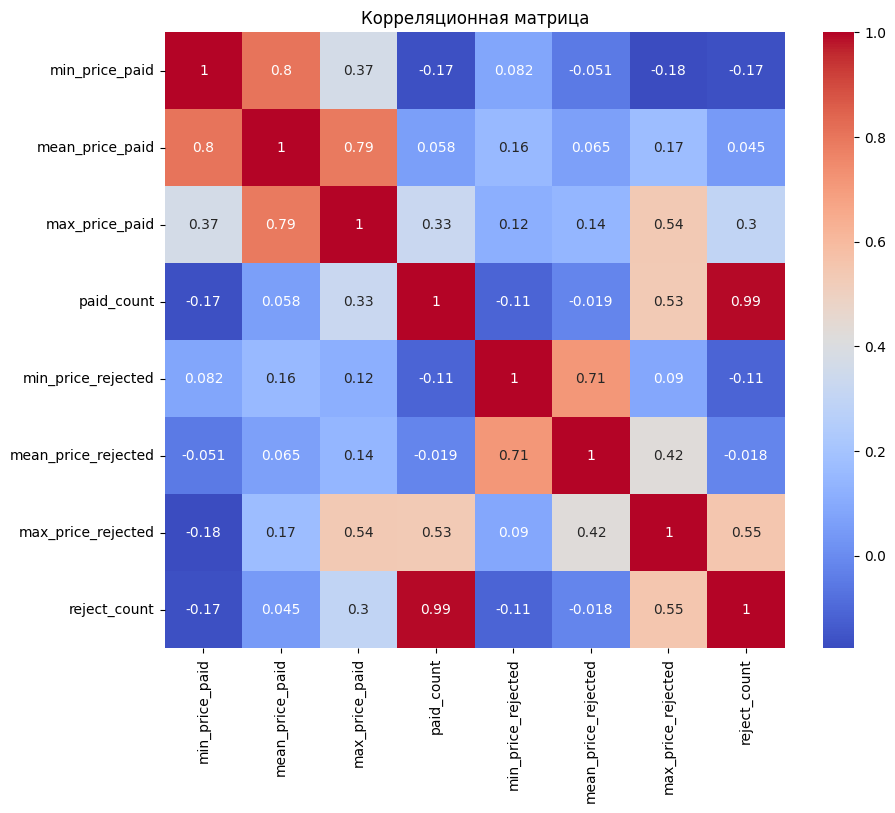

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

Анализ корреляционной матрицы
* Высокая положительная корреляция:
    * min_price_paid и mean_price_paid (0.8): Указывает на то, что минимальная и средняя цена покупок тесно связаны. Если минимальная цена увеличивается, средняя тоже имеет тенденцию к увеличению.
    * mean_price_paid и max_price_paid (0.79): Связь между средней и максимальной ценой покупок также значительна.
    * min_price_rejected и mean_price_rejected (0.71): Минимальная и средняя цена отказов также коррелируют.
    * max_price_paid и max_price_rejected (0.54): Заметная связь между максимальной ценой покупок и отказов.

* Отрицательная корреляция:
    * min_price_paid и max_price_rejected (-0.18): Это может указывать на то, что при увеличении минимальной цены покупок максимальная цена отказов снижается.
    * min_price_paid и reject_count (-0.17): Увеличение минимальной цены покупок может привести к снижению количества отказов.

по ней нам нужен
- анализ отказов - посмотрим корреляцию между ценами отказов и покупок поможет определить, какие товары чаще отвергаются и почему. Это даст возможность скорректировать ассортимент или ценовую политику.
- проведем сегментацию клиентов - разделим  на группы по средней и максимальной цене покупок что бы выявить ценные сегменты и более точно нацелить маркетинговые усилия.

Но это несколько дальше

### LiteGBM

Используем LiteGBM с:
- обработкой числовых признаков и синтезирование новхе фич.
- подбор гиперпараметров с помощью GridSearchCV.

In [ ]:
data_gbm = data_84_11.copy()

In [ ]:
# Обработка числовых признаков
scaler_features = StandardScaler()
numerical_features = ['min_price_paid', 'mean_price_paid', 'max_price_paid', 'paid_count', 'min_price_rejected', 'mean_price_rejected', 'max_price_rejected', 'reject_count']
data_gbm[numerical_features] = scaler_features.fit_transform(data_gbm[numerical_features])

# Обработка целевой переменной
scaler_target = StandardScaler()
data_gbm['reject_count'] = scaler_target.fit_transform(data_gbm[['reject_count']])

In [ ]:
# Синтезирование новых фич
data_gbm['price_range'] = data_gbm['max_price_paid'] - data_gbm['min_price_paid']
data_gbm['rejected_price_range'] = data_gbm['max_price_rejected'] - data_gbm['min_price_rejected']
data_gbm['mean_rejected_price_range'] = data_gbm['mean_price_paid'] - data_gbm['mean_price_rejected']
data_gbm['max_price_paid_2'] = data_gbm['max_price_paid']**2
data_gbm['rejected_price'] = data_gbm['max_price_paid_2'] * data_gbm['min_price_rejected'] / data_gbm['mean_price_paid']

In [ ]:
# Определение зависимостей с помощью LiteGBM
X = data_gbm.drop(columns=['номенклатура', 'reject_count'])
y = data_gbm['reject_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Подбор гиперпараметров
param_grid = {
    'num_leaves': [5, 10, 31, 50, 100],
    'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
    'n_estimators': [10, 50, 100, 200, 300]
}

lgb_model = lgb.LGBMRegressor(objective='regression')
grid_search = GridSearchCV(lgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

Выходные данные были обрезаны до нескольких последних строк (5000).
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requireme

GridSearchCV(cv=5, estimator=LGBMRegressor(objective='regression'),
             param_grid={'learning_rate': [0.001, 0.005, 0.01, 0.05, 0.1, 0.2],
                         'n_estimators': [10, 50, 100, 200, 300],
                         'num_leaves': [5, 10, 31, 50, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
# Лучшие параметры
best_params = grid_search.best_params_
print(f'Лучшие параметры: {best_params}')

Лучшие параметры: {'learning_rate': 0.001, 'n_estimators': 10, 'num_leaves': 5}


In [ ]:
# Обучение модели с лучшими параметрами
best_lgb_model = lgb.LGBMRegressor(**best_params)
best_lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 43, number of used features: 7
[LightGBM] [Info] Start training from score -0.028748
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

LGBMRegressor(learning_rate=0.001, n_estimators=10, num_leaves=5)

In [ ]:
# joblib.dump(best_lgb_model,'/content/drive/MyDrive/barnaul_analitic/analitic_product/best_lgb_model.joblib')

['/content/drive/MyDrive/barnaul_analitic/analitic_product/best_lgb_model.joblib']

In [ ]:
# Прогнозирование и оценка модели
y_pred = best_lgb_model.predict(X_test[X_train.columns])
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {mse}')

Среднеквадратичная ошибка: 1.1830309407084527


### стратегия повышения продаж

In [ ]:
# Для номенклатур, которые хорошо продаются
good_sales = data_84_11[data_84_11['mean_price_paid'] > data_84_11['mean_price_paid'].mean()]
good_sales['suggested_price'] = good_sales['mean_price_paid']* 1.1  # Предположим, поднятие цены на 10%

In [ ]:
# Для номенклатур, которые плохо продаются
bad_sales = data_84_11[data_84_11['mean_price_paid'] <= data_84_11['mean_price_paid'].mean()]
bad_sales['suggested_price'] = bad_sales['mean_price_paid'] * 0.9  # Предположим, снижение цены на 10%

In [ ]:
# Объединение результатов
suggested_prices = pd.concat([good_sales[['номенклатура', 'suggested_price']], bad_sales[['номенклатура', 'suggested_price']]])
suggested_prices

,номенклатура,suggested_price
0,1. II группа по электробезопасности до 1000 В,3795.000000
2,113. Гражданская оборона организаций,3550.555973
4,122. Контрактная система в сфере закупок 122,5018.933333
5,123. Контрактная система в сфере закупок 144,4717.360784
6,124. Контрактная система в сфере закупок товаров 72,4761.035714
8,137. Обучение эвакуационных комиссий,2798.675000
9,138. Общие вопросы охраны труда,2758.471875
11,140. Организация закупок 122,7553.700000
13,142. Организация закупок 72,4620.000000
14,143. Основы промышленной безопасности,2915.000000


✅ **Для Марины**

suggested_prices — это рекомендуемая цена, которая предлагается для каждой номенклатуры на основе анализа данных. +_ 10%. Где 0 - это значит без разницы - все равно не берут

In [ ]:
# Обновление данных с новыми предсказанными ценами
data_gbm['suggested_price'] = suggested_prices['suggested_price'].values

In [ ]:
data_gbm_new = data_84_11.copy()
data_gbm_new.fillna(0, inplace=True)

In [ ]:
data_gbm_new['mean_price_paid'] = data_gbm['suggested_price']
# Синтезирование новых фич
data_gbm_new['price_range'] = data_gbm_new['max_price_paid'] - data_gbm_new['min_price_paid']
data_gbm_new['rejected_price_range'] = data_gbm_new['max_price_rejected'] - data_gbm_new['min_price_rejected']
data_gbm_new['mean_rejected_price_range'] = data_gbm_new['mean_price_paid'] - data_gbm_new['mean_price_rejected']
data_gbm_new['max_price_paid_2'] = data_gbm_new['max_price_paid']**2
data_gbm_new['rejected_price'] = data_gbm_new['max_price_paid_2'] * data_gbm_new['min_price_rejected'] / data_gbm_new['mean_price_paid']

In [ ]:
X_new = data_gbm_new[numerical_features + ['price_range', 'rejected_price_range', 'mean_rejected_price_range', 'max_price_paid_2', 'rejected_price']]
y_new_pred = best_lgb_model.predict(X_new.drop(columns=['reject_count'], axis=1))

In [ ]:
y_new_pred_original_scale = scaler_target.inverse_transform(np.array(y_new_pred).reshape(-1, 1))

In [ ]:
# Вывод прогнозируемых продаж
data_gbm['predicted_sales'] = y_new_pred_original_scale
data_gbm[['номенклатура', 'suggested_price', 'predicted_sales']]

,номенклатура,suggested_price,predicted_sales
0,1. II группа по электробезопасности до 1000 В,3795.000000,-0.024586
1,"102. Безопасные методы и приемы работ с ручным инструментом, в том числе с пиротехническим",3550.555973,-0.024586
2,113. Гражданская оборона организаций,5018.933333,-0.024586
3,115. Использование (применение) средств индивидуальной защиты,4717.360784,-0.024586
4,122. Контрактная система в сфере закупок 122,4761.035714,-0.024586
5,123. Контрактная система в сфере закупок 144,2798.675000,-0.024586
6,124. Контрактная система в сфере закупок товаров 72,2758.471875,-0.024586
7,135. Обучение по охране труда,7553.700000,-0.024586
8,137. Обучение эвакуационных комиссий,4620.000000,-0.024586
9,138. Общие вопросы охраны труда,2915.000000,-0.024586


мимо. меняем модель

In [ ]:
data = data_84_11.copy()
data_2 = data_84_11.copy()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import featuretools as ft

# Предобработка данных
data.fillna(0, inplace=True)  # Заполнение пропущенных значений нулями

# Обработка числовых признаков
scaler_features = StandardScaler()
numerical_features = ['min_price_paid', 'mean_price_paid', 'max_price_paid', 'min_price_rejected', 'mean_price_rejected', 'max_price_rejected', 'reject_count']
data[numerical_features] = scaler_features.fit_transform(data[numerical_features])

# Обработка целевой переменной
scaler_target = StandardScaler()
data['paid_count'] = scaler_target.fit_transform(data[['paid_count']])

# Синтезирование новых фич с помощью featuretools
es = ft.EntitySet(id='sales_data')
es = es.add_dataframe(dataframe_name='sales', dataframe=data, index='номенклатура')

feature_matrix, feature_defs = ft.dfs(entityset=es, target_dataframe_name='sales', max_depth=2)

# Объединение синтезированных фич с исходными данными
data = data.merge(feature_matrix, on='номенклатура', suffixes=('', '_ft'))

# Определение зависимостей с помощью RandomForestRegressor
X = data.drop(columns=['номенклатура', 'paid_count'])
y = data['paid_count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Подбор гиперпараметров
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_

# Обучение модели с лучшими параметрами
best_rf_model = RandomForestRegressor(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
# Прогнозирование и оценка модели
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Среднеквадратичная ошибка: {mse}')

Среднеквадратичная ошибка: 0.054130010221519795


In [ ]:
# Обновление данных с новыми предсказанными ценами
data['suggested_price'] = suggested_prices['suggested_price'].values
data_2['mean_price_paid'] = data['suggested_price']

# Синтезирование новых фич с обновленными данными
es_new = ft.EntitySet(id='sales_data_new')
es_new = es_new.add_dataframe(dataframe_name='sales_new', dataframe=data_2, index='номенклатура')

feature_matrix_new, feature_defs_new = ft.dfs(entityset=es_new, target_dataframe_name='sales_new', max_depth=2)

# Объединение синтезированных фич с обновленными данными
data_new = data_2.merge(feature_matrix_new, on='номенклатура', suffixes=('', '_ft'))

# Прогнозирование продаж после изменения цен с использованием RandomForestRegressor
X_new = data_new.drop(columns=['номенклатура', 'paid_count'])
y_new_pred = best_rf_model.predict(X_new)

# Возврат к исходному масштабу данных
y_new_pred_original_scale = scaler_target.inverse_transform(np.array(y_new_pred).reshape(-1, 1))


In [ ]:
data_3 = data_84_11.copy()

In [ ]:
# Вывод прогнозируемых продаж
data_3['predicted_sales'] = y_new_pred_original_scale
data_3['suggested_price'] = suggested_prices['suggested_price'].values
data_3[['номенклатура', 'mean_price_paid', 'suggested_price', 'paid_count', 'predicted_sales']]

,номенклатура,mean_price_paid,suggested_price,paid_count,predicted_sales
0,1. II группа по электробезопасности до 1000 В,3450.000000,3795.000000,3.0,411.623333
1,"102. Безопасные методы и приемы работ с ручным инструментом, в том числе с пиротехническим",529.000000,3550.555973,2.0,307.190000
2,113. Гражданская оборона организаций,3227.778157,5018.933333,293.0,852.650000
3,115. Использование (применение) средств индивидуальной защиты,2338.054983,4717.360784,582.0,852.650000
4,122. Контрактная система в сфере закупок 122,4562.666667,4761.035714,90.0,852.650000
5,123. Контрактная система в сфере закупок 144,4288.509804,2798.675000,153.0,852.650000
6,124. Контрактная система в сфере закупок товаров 72,4328.214286,2758.471875,112.0,852.650000
7,135. Обучение по охране труда,625.000000,7553.700000,1.0,626.320000
8,137. Обучение эвакуационных комиссий,2544.250000,4620.000000,76.0,852.650000
9,138. Общие вопросы охраны труда,2507.701705,2915.000000,1056.0,852.650000


Аналогично. Наш эксперемент под названием "зависимость продаж отцены" разбился об скалы реальности - цена на продажу сильно не влиет... если крутить околосредних значений +- 10% продажи не изменятся. Поэтому наверное стоит поднять планку низа продаж... Все равно - либо берут, либо нет. Но это пока только по 84.11. ЛАдно. пойдем смотреть отказы.

### Анализ отказов

In [ ]:
data_84_11_all = final_df_2[final_df_2['оквэд']=='84.11']
data_84_11_all.drop(columns=['вид_деятельности', 'оквэд'], axis=1, inplace=True)
data_84_11_all.head()

,инн_организации,год,дата_оплаты_счета,дата_первого_звонка,дата_последнего_звонка,отказ,заявка,минут_разговора,минут_звонка,количество_звонков,номер_менеджера,средняя_настойчивость,среднее_количество_вопросов,средняя_вероятность_продажи_ГПТ,количество_продажных_разговоров,сумма,количество_удостоверений,цена_за_удостоверение,наименование_региона,фио_менеджера,количество_счетов,количество_пакет,бюджет,статус,месяц,длительность_убеждения,цикл сделки
2,101005527,2024,2262-04-11,2024-05-07,2024-05-07,0,0,2,2,1,1403,NaN,NaN,NaN,0,NaN,NaN,NaN,Республика Адыгея,NaN,NaN,NaN,1,текущая,NaN,0,NaN
3,101005686,2023,2262-04-11,2023-11-16,2023-11-16,0,0,0,3,1,2360,NaN,NaN,NaN,0,NaN,NaN,NaN,Республика Адыгея,NaN,NaN,NaN,1,отказ,NaN,0,NaN
22,106006387,2024,2024-05-19,2024-05-15,2024-05-15,0,1,0,27,1,7388,NaN,NaN,NaN,0,210210.0,77.0,390.0,Республика Адыгея,Неугодникова Наталия Валериевна,7.0,0.0,1,завершена,5.0,0,4.0
24,201002128,2024,2262-04-11,2023-11-03,2024-02-06,0,0,0,7,2,6266,0.0,2.0,0.532,1,NaN,NaN,NaN,Республика Башкортостан,NaN,NaN,NaN,1,текущая,NaN,95,NaN
30,204004437,2024,2024-02-25,2024-02-14,2024-02-14,0,1,0,17,1,1029,NaN,NaN,NaN,0,10200.0,1.0,10200.0,Республика Башкортостан,Кузина Наталия Александровна,1.0,0.0,1,завершена,2.0,0,11.0


In [ ]:
data_84_11_all[data_84_11_all['статус'] == 'отказ']

,инн_организации,год,дата_оплаты_счета,дата_первого_звонка,дата_последнего_звонка,отказ,заявка,минут_разговора,минут_звонка,количество_звонков,номер_менеджера,средняя_настойчивость,среднее_количество_вопросов,средняя_вероятность_продажи_ГПТ,количество_продажных_разговоров,сумма,количество_удостоверений,цена_за_удостоверение,наименование_региона,фио_менеджера,количество_счетов,количество_пакет,бюджет,статус,месяц,длительность_убеждения,цикл сделки
3,101005686,2023,2262-04-11,2023-11-16,2023-11-16,0,0,0,3,1,2360,NaN,NaN,NaN,0,NaN,NaN,NaN,Республика Адыгея,NaN,NaN,NaN,1,отказ,NaN,0,NaN
39,209001133,2024,2262-04-11,2024-01-10,2024-01-10,0,0,0,1,1,2161,NaN,NaN,NaN,0,NaN,NaN,NaN,Республика Башкортостан,NaN,NaN,NaN,1,отказ,NaN,0,NaN
112,244001961,2024,2262-04-11,2024-01-16,2024-01-16,0,0,0,8,1,1164,3.0,8.0,0.690,1,NaN,NaN,NaN,Республика Башкортостан,NaN,NaN,NaN,1,отказ,NaN,0,NaN
151,269023501,2024,2262-04-11,2024-01-22,2024-01-22,0,0,0,17,1,4709,3.0,12.0,0.919,1,NaN,NaN,NaN,Республика Башкортостан,NaN,NaN,NaN,1,отказ,NaN,0,NaN
182,301003661,2024,2262-04-11,2024-01-29,2024-01-29,0,0,0,5,1,5478,2.0,13.0,0.358,0,NaN,NaN,NaN,Республика Бурятия,NaN,NaN,NaN,1,отказ,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33550,9107003057,2024,NaT,2024-02-28,2024-02-28,1,0,0,1,1,2392,0.0,1.0,0.569,0,NaN,NaN,NaN,Республика Крым,NaN,NaN,NaN,1,отказ,NaN,0,NaN
33568,9109007191,2024,NaT,2024-05-02,2024-05-02,1,0,1,2,1,1467,NaN,NaN,NaN,0,NaN,NaN,NaN,Республика Крым,NaN,NaN,NaN,1,отказ,NaN,0,NaN
33579,9110086840,2024,NaT,2024-07-12,2024-07-12,1,0,0,14,1,6683,7.0,14.0,0.951,1,NaN,NaN,NaN,Республика Крым,NaN,NaN,NaN,1,отказ,NaN,0,NaN
33580,9110087258,2024,NaT,2024-02-28,2024-02-28,1,0,6,17,1,4330,1.0,1.0,0.746,1,NaN,NaN,NaN,Республика Крым,NaN,NaN,NaN,1,отказ,NaN,0,NaN


In [ ]:
data_84_11_all_rejected = data_84_11_all[data_84_11_all['статус'] == 'отказ']
data_84_11_all_plade = data_84_11_all[data_84_11_all['статус'] != 'отказ']


# Анализ корреляции
correlation_matrix_rejected = data_84_11_all_rejected[['цена_за_удостоверение', 'количество_звонков', 'минут_звонка',
                                     'длительность_убеждения', 'цикл сделки', 'номер_менеджера', 'сумма',
                                     'количество_счетов', 'длительность_убеждения'
                                     ]].corr()
correlation_matrix_plade = data_84_11_all_plade[['цена_за_удостоверение', 'количество_звонков', 'минут_звонка',
                                     'длительность_убеждения', 'цикл сделки', 'номер_менеджера', 'сумма',
                                     'количество_счетов', 'длительность_убеждения'
                                     ]].corr()

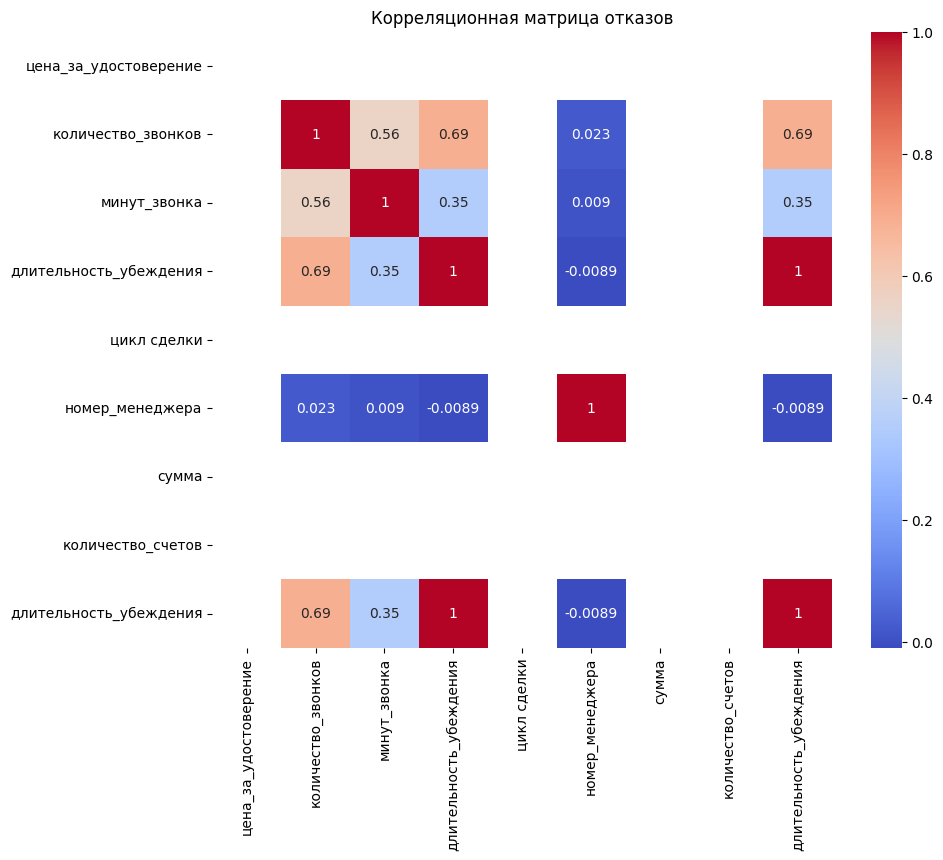

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_rejected, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица отказов')
plt.show()

по отказам непонятно - нет сумм от которых отказались

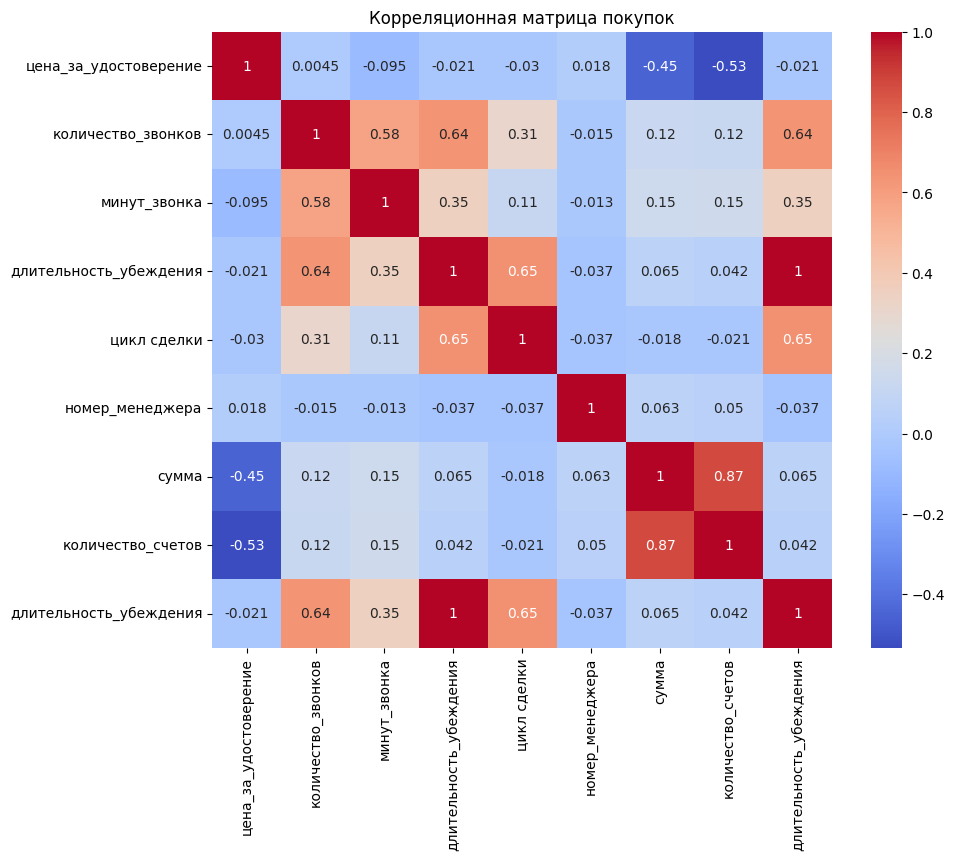

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_plade, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица покупок')
plt.show()

✅ **Для Марины**

Анализ зависимости "цена_за_удостоверение" и "сумма" имеет отрицательную корреляцию (-0.45):

Значит существует умеренно сильная отрицательная корреляция между "цена_за_удостоверение" и "сумма". Это означает, что с увеличением цены за удостоверение общая сумма покупок имеет тенденцию снижаться.

Причины: Это может быть связано с тем, что более высокая цена за удостоверение отпугивает покупателей, уменьшая тем самым общую сумму продаж.


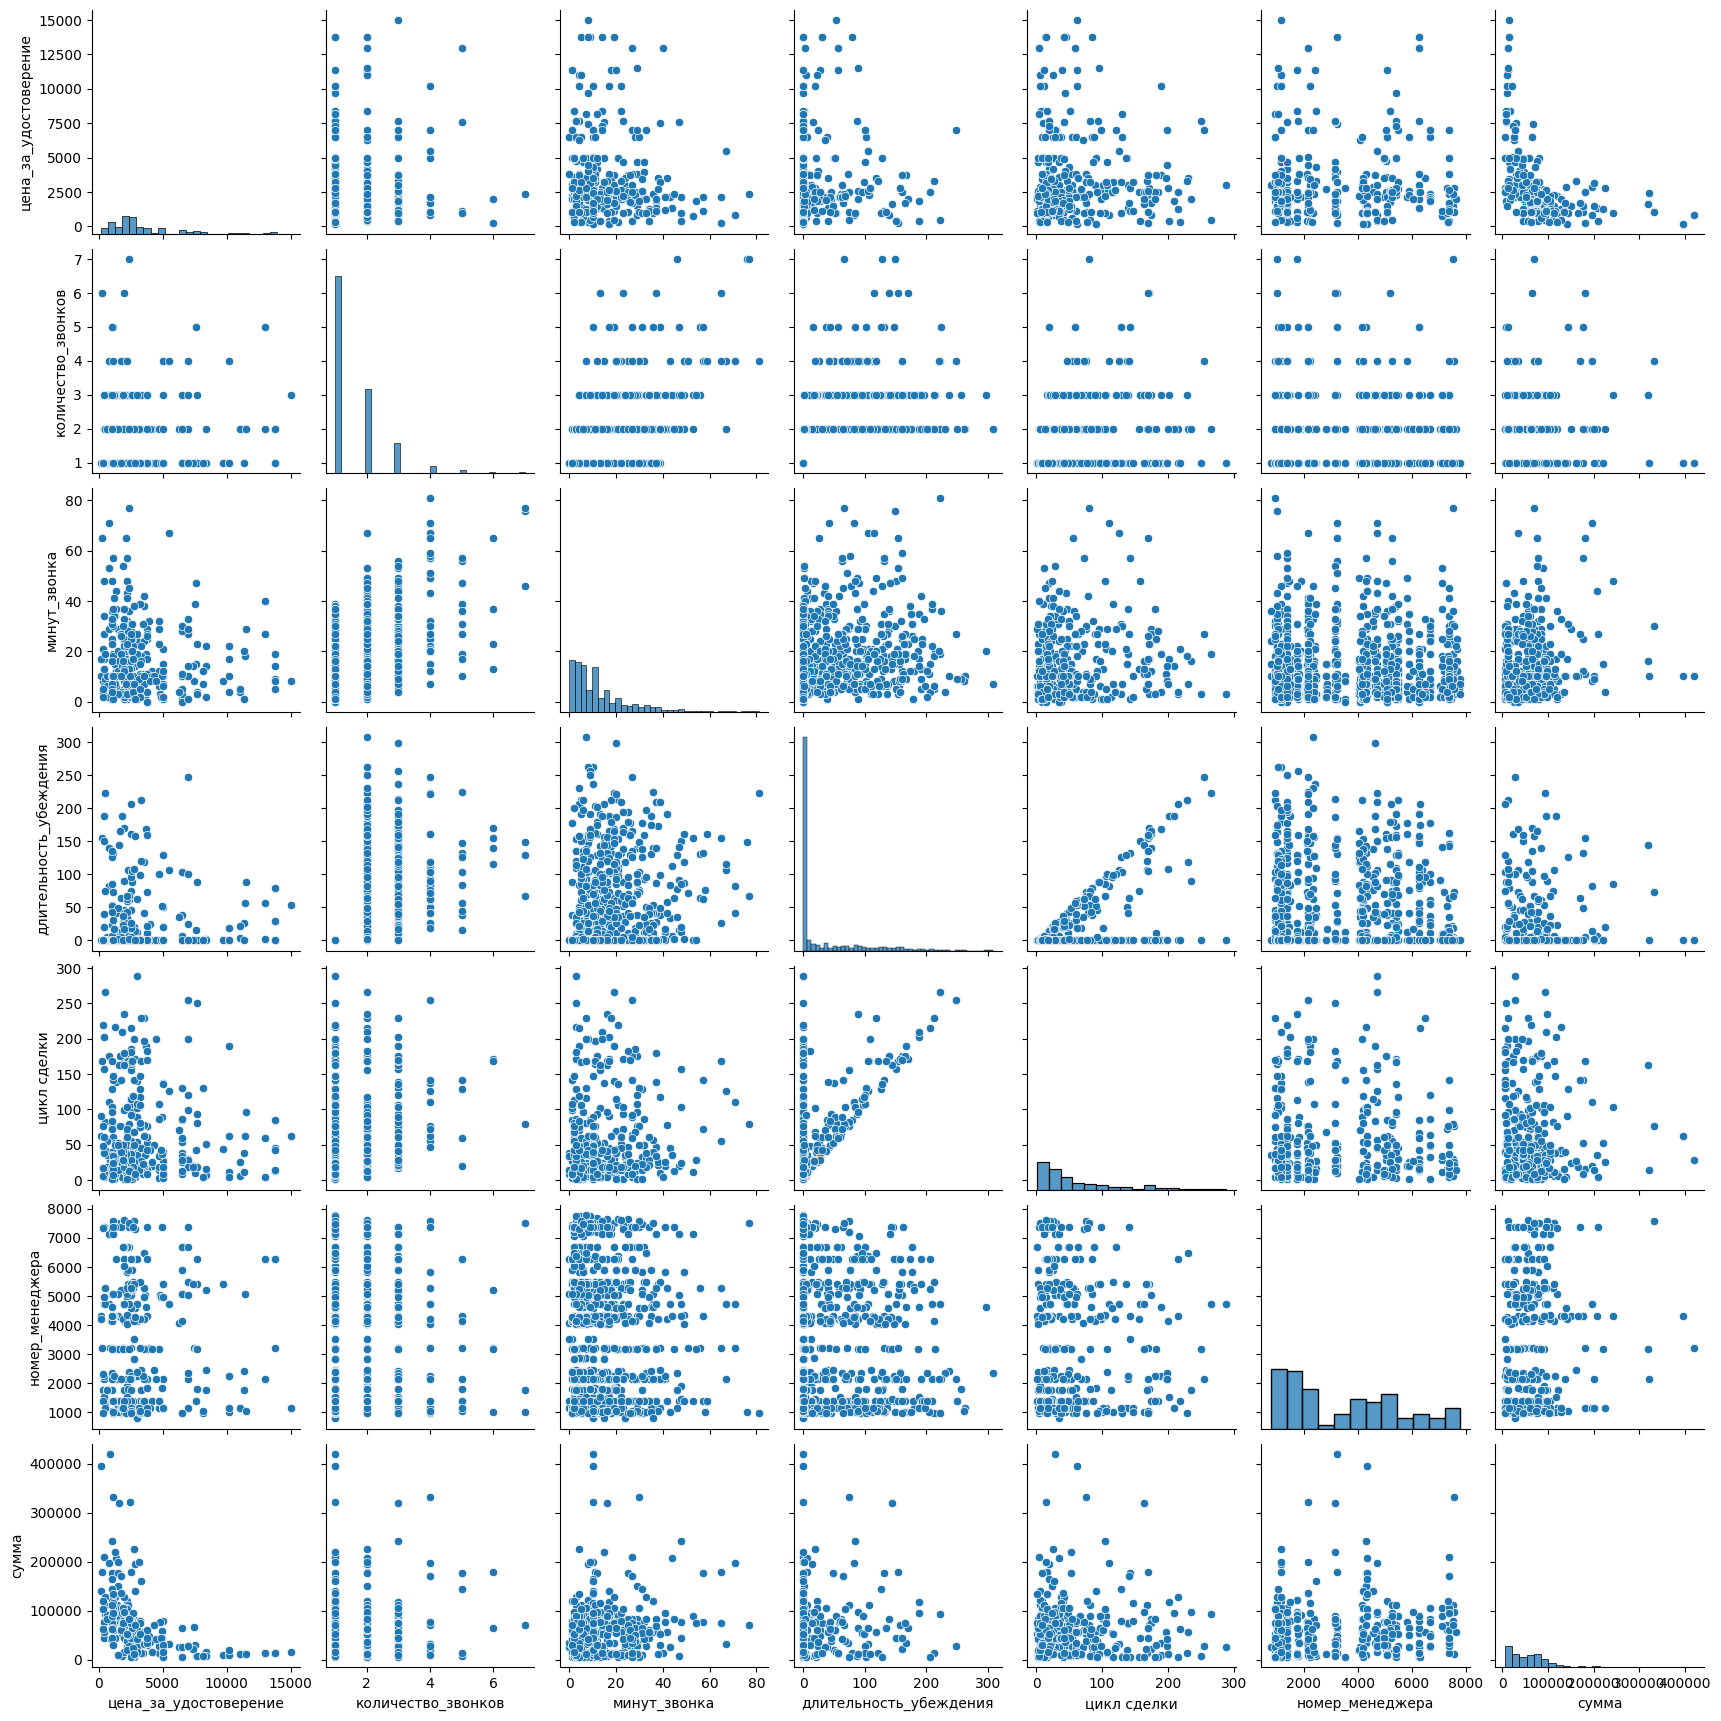

In [ ]:
# Диаграммы рассеяния
sns.pairplot(data_84_11_all_plade[['цена_за_удостоверение', 'количество_звонков', 'минут_звонка',
                             'длительность_убеждения', 'цикл сделки', 'номер_менеджера', 'сумма']])
plt.show()

## Приехали

✅ **Для Марины**

так стоп. это все бессмыслено. прямой зависимости продаж от цен нет. есть продукт, есть клиент. и единственное звено которое можно конркетно вляеть на продажи - это менеджер. потому что одинаковые виды деятельности то отказываются, то покупают, цены не бью совсем... пока единственное что есть:
- на прибыль влияет цена за удостоверение.
- у ОКВЭДОВ есть свои НОМЕНКЛАТУРЫ
- у менеджеров есть любимые ОКВЭДЫ.

Все. Все остальное бред, я закопался по уши. Только разговоры (лейблы) могут помочь понять почему не покупают. А кому и что продать мы и так знаем.

Вот тебе таблица где, строки = оквэд, столбцы: "топ_продаваемых" (где текстом перечислены номенклатуры ТОП-10 самых продаваемых для данного оквэд), "топ_непродаваемых" (где текстом перечислены номенклатуры ТОП-10 не продаваемых для данного оквэд), "не_заинтересован" (где текстом перечислены номенклатуры которые ни разу не предлагались в данном оквэд).

И отдельно 10 номенклатур которые чаще всего повторяются в "не_заинтересован" но при этом ни разу не встречались в "топ_продаваемых" (то есть те продукты которые никому не нужны)

In [ ]:
# Функция для получения ТОП-10 продаваемых и непродаваемых номенклатур
def get_top_nomenklatur(df, okved, n=10):
    # Фильтруем по ОКВЭД
    df_okved = df[df['оквэд'] == okved]

    # ТОП-10 продаваемых
    top_sold = df_okved[df_okved['решение_об_оплате'] != 'отказ']['номенклатура'].value_counts().head(n).index.tolist()

    # ТОП-10 непродаваемых
    top_unsold = df_okved[df_okved['решение_об_оплате'] == 'отказ']['номенклатура'].value_counts().head(n).index.tolist()

    # Номенклатуры, которые ни разу не предлагались
    all_nomenklatur = set(df['номенклатура'].unique())
    sold_nomenklatur = set(df_okved[df_okved['решение_об_оплате'] != 'отказ']['номенклатура'].unique())
    unsold_nomenklatur = set(df_okved[df_okved['решение_об_оплате'] == 'отказ']['номенклатура'].unique())
    never_offered = list(all_nomenklatur - sold_nomenklatur - unsold_nomenklatur)

    return top_sold, top_unsold, never_offered

In [ ]:
unique_okved = data_nom['оквэд'].unique()

# Создаем новую таблицу
new_table = {
    'оквэд': [],
    'топ_продаваемых': [],
    'топ_непродаваемых': [],
    'не_заинтересован': []
}

In [ ]:
for okved in unique_okved:
    top_sold, top_unsold, never_offered = get_top_nomenklatur(data_nom, okved)
    new_table['оквэд'].append(okved)
    new_table['топ_продаваемых'].append(', '.join(map(str, top_sold)))
    new_table['топ_непродаваемых'].append(', '.join(map(str, top_unsold)))
    new_table['не_заинтересован'].append(', '.join(map(str, never_offered)))

new_df = pd.DataFrame(new_table)

In [ ]:
new_df = new_df.sort_values(by='оквэд')
new_df.head()

оквэд  \
25    01.1   
26   01.11   
30   01.13   
354  01.16   
201  01.19   

                                                                                                                                                                                                                                                                                                                                                                                                          топ_продаваемых  \
25       139. Оказание первой помощи пострадавшим, 138. Общие вопросы охраны труда, 146. Оценка профессиональных рисков, 115. Использование (применение) средств индивидуальной защиты, 145. Отходы, 153. Пожарная безопасность для руководителей организаций, лиц, назначенных руководителем, 173. Экология, 113. Гражданская оборона организаций, 158. Противопожарный инструктаж, 137. Обучение эвакуационных комиссий   
26       139. Оказание первой помощи пострадавшим, 138. Общие вопросы охраны труда, 146. Оценка профессиональных рисков, 115. Использование (применение) средств индивидуальной защиты, 153. Пожарная безопасность для руководителей организаций, лиц, назначенных руководителем, 145. Отходы, 173. Экология, 113. Гражданская оборона организаций, 158. Противопожарный инструктаж, 137. Обучение эвакуационных комиссий   
30   139. Оказание первой помощи пострадавшим, 146. Оценка профессиональных рисков, 138. Общие вопросы охраны труда, 115. Использование (применение) средств индивидуальной защиты, 153. Пожарная безопасность для руководителей организаций, лиц, назначенных руководителем, 173. Экология, 145. Отходы, 113. Гражданская оборона организаций, 158. Противопожарный инструктаж, 168. Специалист по пожарной профилактике   
354                                                                                                                                                                                                                                                                                                                                                                                                                         
201                              139. Оказание первой помощи пострадавшим, 138. Общие вопросы охраны труда, 145. Отходы, 173. Экология, 113. Гражданская оборона организаций, 153. Пожарная безопасность для руководителей организаций, лиц, назначенных руководителем, 4. IV группа по электробезопасности до 1000 В, 146. Оценка профессиональных рисков, 115. Использование (применение) средств индивидуальной защиты   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                топ_непродаваемых  \
25   145. Отходы, 173. Экология, 138. Общие вопросы охраны труда, 139. Оказание первой помощи пострадавшим, 115. Использование (применение) средств индивидуальной защиты, 146. Оценка профессиональных рисков, 153. Пожарная безопасность для руководителей организаций, лиц, назначенных руководителем, 165. Работа с отходами I-IV класса опасности, 171. Техносферная безопасность.Безопасность технологических процессов и производств, 113. Гражданская оборона организаций   
26                                                                 139. Оказание первой помощи пострадавшим, 138. Общие вопросы охраны труда, 145. Отходы, 173. Экология, 115. Использование (применение) средств индивидуальной защиты, 146. Оценка профессиональных рисков, 153. Пожарная безопасность для руководителей организаций, лиц, назначенных руководителем, 113. Гражданская оборона организаций, 135. Обучение по охране труда, 137. Обучение эвакуационных комиссий   
30                                

In [ ]:
# номенклатуры, которые чаще всего повторяются в "не_заинтересован" но ни разу не встречаются ни в одном "топ_продаваемых"
all_top_sold = set([item for sublist in new_df['топ_продаваемых'] for item in sublist.split(', ')])
never_offered_counts = pd.Series([item for sublist in new_df['не_заинтересован'] for item in sublist.split(', ')])
never_offered_filtered = never_offered_counts[~never_offered_counts.isin(all_top_sold)]

In [ ]:
# 10 номенклатур, которые чаще всего повторяются в "не_заинтересован" но ни разу не встречаются ни в одном "топ_продаваемых"
print("ТОП-10 номенклатур, которые никому не нужны:")
never_offered_filtered.value_counts().head(10).index.tolist()

ТОП-10 номенклатур, которые никому не нужны:


['131. Обучение мерам пожарной безопасности',
 '129. Новое в законодательстве по охране труда в 2022 году',
 '23. Б.1.16',
 '105. В.1 Гидротехнические сооружения объектов промышленности',
 '160. профилактика ковид образовательные',
 '74. Б.11.3',
 '108. Г.1.1.',
 '26. Б.2.1',
 '170. тест',
 '148. Первая помощь в образовательной организации']

In [ ]:
# 20 номенклатур
print("ТОП-20 номенклатур, которые никому не нужны:")
never_offered_counts.value_counts().head(20).index.tolist()

ТОП-20 номенклатур, которые никому не нужны:


['18. Б.1.11',
 '26. Б.2.1',
 '131. Обучение мерам пожарной безопасности',
 '108. Г.1.1.',
 '174. Экология при обращении с отходами',
 '170. тест',
 '160. профилактика ковид образовательные',
 '105. В.1 Гидротехнические сооружения объектов промышленности',
 '23. Б.1.16',
 '129. Новое в законодательстве по охране труда в 2022 году',
 '74. Б.11.3',
 '148. Первая помощь в образовательной организации',
 '130. Обучение дружинников ПТМ',
 '71. Б.10.2',
 '11. Б.1.4',
 '50. Б.7.3',
 '155. Пожарно-технический минимум',
 '96. Безопасные методы и приемы при выполнении водолазных работ',
 '77. Безлимит для детдомов и домов ребенка',
 '119. Комплексное обеспечение антитеррористической защищенности на объектах спорта']

Да хоть все. эти можно вообще убирать - они за полтора года ни разу не были купленны.

In [ ]:
never_offered_filtered.value_counts()

,count
131. Обучение мерам пожарной безопасности,456
129. Новое в законодательстве по охране труда в 2022 году,456
23. Б.1.16,456
105. В.1 Гидротехнические сооружения объектов промышленности,456
160. профилактика ковид образовательные,456
74. Б.11.3,456
108. Г.1.1.,456
26. Б.2.1,456
170. тест,456
148. Первая помощь в образовательной организации,455


P.S. А вот тебе 10 самых продаваемых направлений - на эти надо ставить акции и спамить продажи.

In [ ]:
need_counts = pd.Series([item for sublist in new_df['топ_продаваемых'] for item in sublist.split(', ')])
need_counts.value_counts().head(10).index.tolist()

['139. Оказание первой помощи пострадавшим',
 '138. Общие вопросы охраны труда',
 '146. Оценка профессиональных рисков',
 '115. Использование (применение) средств индивидуальной защиты',
 '153. Пожарная безопасность для руководителей организаций',
 'лиц',
 'назначенных руководителем',
 '173. Экология',
 '145. Отходы',
 '113. Гражданская оборона организаций']

In [ ]:
new_df.to_excel('/content/drive/MyDrive/barnaul_analitic/base/чем_живет_оквэд.xlsx', index=False)

✅ **Для Марины**

А я удаляюсь - иначе толку не будет. Теперь план следующий:

1. я изучу лейблы: строю матрицу зависимости продаж от лейблов. и какие лейблы каким менеджерам\оквэд\продуктам соотвествуют.
2. я кластеризирую клиентов: по общим харрактеристикам (наша база); по проверкам (база прокуратуры). далее
3. я кластеризирую продукт по классам организаций (по русски кому что продать). Далее
4. Я кластеризирую менеджеров по классам продуктов и классам клиентов. И тогда мы поймем: кто должен кому что продавать
5. Оберну в упаковку, повешу бантик и назовем зачатком рекомендательной системой.

иначе я так и буду дальше в темноте негров ловить